## Data Manipulation

### We broadly do data manipulation using the following strategies:
#### 1. Creation of new variable
#### 2. Aggregate
#### 3. Sort
#### 4. Merge
#### 5. Append

## 1. Creation of a new variable

The following are the ways of creating new variables:
* a. A column derived from the existing column(s) to get useful insights
* b. Dummy variable (binary variable) creation to use certain models which expect numerical input
* c. Combining variables to reduce the dimensionality
* d. Reduce the levels of categorical variables to facilitate better view of the insights

*We shall restructure data sets to convert them from one format to another (ie., transformation) in order to get some meaningful insights.*

We shall restructure data sets to convert them from one format to another (ie., transformation) in order to get some meaningful insights.

Case study: A company employees salary

We shall use a subset of this information that contains the following information:

* 1) Employee ID: A unique number to indentify the employee within the company
* 2) Age:  Age of the employee
* 3) EduYears: Years of formal education
* 4) Salary: Basic salary per annum
* 5) Experience: Years of experience in the same company

**a)    A column derived from the existing column(s) to get useful insights**

In [1]:
### lOAD libraries

import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib
from   random            import *

In [2]:
print("\n Pandas version %s " %pd.__version__)
print("\n NumPy version %s " %np.__version__)
print("\n Matplotlib version %s " %matplotlib.__version__)


 Pandas version 0.23.4 

 NumPy version 1.16.3 

 Matplotlib version 2.1.0 


In [3]:
sal_data = pd.read_csv('D:/RRD/data/Employees Salary.csv', header = 0)

In [4]:
print('\nTotal Number of observations is %d Total Number of columns %d' \
      %(sal_data.shape[0],sal_data.shape[1]))


Total Number of observations is 1000 Total Number of columns 7


In [5]:
print(sal_data.head().T)

                       0        1         2        3         4
empID              19096    59783     58741    59870     78873
age                 49.5     37.6      24.8     32.9      46.9
eduYears              13       13        15       15        12
experience            32       21         8       16        30
salary            599200   427600    244000   388000    532000
gender            Female     Male      Male     Male      Male
maritalStatus  Unmarried  Widower  Divorced  Widower  Divorced


We shall create variables as explained below:
* Create a variable, Above_600k to indicate employees drawing more than Rs 600000 per annum.
* Discretize or separate into bins eduYears to facilitate quick analysis.

In [6]:
"""
Write a function that supplies values to a variable, Above_600k:
assign a value 'Yes', when the salary is above 600000; else assign 'No'

"""
def define_class(x):

    median_x = 600000.00
    res = ''
    try:
        
        res = 'NaN'
        
        val = float(x)

        if val >=  median_x:
           res = 'Yes' 
        elif val < median_x:
           res = 'No' 
        
    except:
        res = 'NaN'
        print("That's not an int!")

    return res



In [7]:
sal_data['Above_600k']      = sal_data[['salary']].apply(define_class, axis = 1)

We use cut function of pandas, when you want to segment data values into bins.
Here we use cut to convert Years of education, eduYears to groups of pre-specified array of bins.
We divide these into bins of 10 to 14, 15 to 16, 17 to 18 and label them as  ['Secondary Education','Graduate','Post Graduate']. Pandas cut computes these bins and return a Categorical object.

We specify right = True to means that the bin includes the right most edge is included and it is indicated by ] bracket.

In [8]:
sal_data['Education_Level'] =  pd.cut(sal_data['eduYears'], [10, 14, 16, 18], \
                                      labels = ['Secondary Education','Graduate','Post Graduate'],\
                                      right = True) 

In [9]:
sal_data['Education_Level'].value_counts()

Secondary Education    485
Graduate               409
Post Graduate          106
Name: Education_Level, dtype: int64

The function, qcut bins the data based on sample quantiles, which will yield roughly equal size bins.
Let us use age to create quantile bins.

In [10]:
sal_data['age_bin'] =  pd.qcut(sal_data['age'], 4) 

In [11]:
sal_data.tail().T

,995,996,997,998,999
empID,10104,71394,35598,86641,25631
age,46.2,47.4,48.2,32.1,42
eduYears,16,17,14,16,16
experience,29,30,31,15,25
salary,656800,712000,620800,388000,580000
gender,Male,Male,Female,Male,Male
maritalStatus,Divorced,Divorced,Unmarried,Widower,Widower
Above_600k,Yes,Yes,Yes,No,No
Education_Level,Graduate,Post Graduate,Secondary Education,Graduate,Graduate
age_bin,"(45.5, 54.9]","(45.5, 54.9]","(45.5, 54.9]","(29.275, 37.45]","(37.45, 45.5]"


In [12]:
sal_data['age_bin'].value_counts()

(37.45, 45.5]       251
(29.275, 37.45]     250
(21.099, 29.275]    250
(45.5, 54.9]        249
Name: age_bin, dtype: int64

b. Dummy variable (binary variable) creation to use certain models which expect numerical input

* There is another type of transformation in statistical modelling is *to convert a categorical variable into dummy or indicator variable.*

* If a categorical variable column has k distinct levels, you would get a matrix with k columns containing all 1s and 0s. 

* Pandas has get_dummies() for doing this. 

In [13]:
df_dummy = pd.get_dummies(sal_data,drop_first = True)

In [14]:
df_dummy .tail().T

,995,996,997,998,999
empID,10104.0,71394.0,35598.0,86641.0,25631.0
age,46.2,47.4,48.2,32.1,42.0
eduYears,16.0,17.0,14.0,16.0,16.0
experience,29.0,30.0,31.0,15.0,25.0
salary,656800.0,712000.0,620800.0,388000.0,580000.0
gender_Male,1.0,1.0,0.0,1.0,1.0
maritalStatus_Married,0.0,0.0,0.0,0.0,0.0
maritalStatus_Separated,0.0,0.0,0.0,0.0,0.0
maritalStatus_Unmarried,0.0,0.0,1.0,0.0,0.0
maritalStatus_Widow,0.0,0.0,0.0,0.0,0.0


In [15]:
df1 = pd.DataFrame({'Gender' : ['M','M','F','F','M','M','F','F','F','F','F','F']})
df2 = pd.get_dummies(df1, drop_first = False)
print('df1 after encoding without drop_first = False\n')
print(pd.concat([df1, df2], axis=1).head(4).T)

df1 after encoding without drop_first = False

          0  1  2  3
Gender    M  M  F  F
Gender_F  0  0  1  1
Gender_M  1  1  0  0


In [16]:
df3 = pd.get_dummies(df1, drop_first = True)
print('df1 after encoding without drop_first = True\n')
print(pd.concat([df1, df3], axis=1).head(4).T)

df1 after encoding without drop_first = True

          0  1  2  3
Gender    M  M  F  F
Gender_M  1  1  0  0


c. Combining variables to reduce the dimensionality and combibe levels to reduce dimensionality

Let us combine two variables, Gender (Male & Female) and Marital Status (Unmarried, Married , Widow/ Widower, Separated).

In [17]:
sal_data['Gender_Marital'] = sal_data['gender'] + '-'+ sal_data['maritalStatus'] 
sal_data.head().T

,0,1,2,3,4
empID,19096,59783,58741,59870,78873
age,49.5,37.6,24.8,32.9,46.9
eduYears,13,13,15,15,12
experience,32,21,8,16,30
salary,599200,427600,244000,388000,532000
gender,Female,Male,Male,Male,Male
maritalStatus,Unmarried,Widower,Divorced,Widower,Divorced
Above_600k,No,No,No,No,No
Education_Level,Secondary Education,Secondary Education,Graduate,Graduate,Secondary Education
age_bin,"(45.5, 54.9]","(37.45, 45.5]","(21.099, 29.275]","(29.275, 37.45]","(45.5, 54.9]"


d. Reduce the levels of categorical variables to facilitate better view of the insights

Let us get the levels of maritalStatus

In [18]:
sal_data['maritalStatus'].value_counts()

Divorced     215
Separated    212
Unmarried    206
Married      179
Widower       97
Widow         91
Name: maritalStatus, dtype: int64

Let us combine levels Widow and Widower as Spouse Expired and thus reducing one level.

In [19]:
spouseStatus              = ['Divorced','Separated','Unmarried','Married']
sal_data['maritalStatus'] = \
                            sal_data.maritalStatus.where(sal_data.maritalStatus.isin(spouseStatus),\
                                                         'Spouse Expired')

sal_data.head().T

,0,1,2,3,4
empID,19096,59783,58741,59870,78873
age,49.5,37.6,24.8,32.9,46.9
eduYears,13,13,15,15,12
experience,32,21,8,16,30
salary,599200,427600,244000,388000,532000
gender,Female,Male,Male,Male,Male
maritalStatus,Unmarried,Spouse Expired,Divorced,Spouse Expired,Divorced
Above_600k,No,No,No,No,No
Education_Level,Secondary Education,Secondary Education,Graduate,Graduate,Secondary Education
age_bin,"(45.5, 54.9]","(37.45, 45.5]","(21.099, 29.275]","(29.275, 37.45]","(45.5, 54.9]"


In [20]:
sal_data['maritalStatus'].value_counts() 

Divorced          215
Separated         212
Unmarried         206
Spouse Expired    188
Married           179
Name: maritalStatus, dtype: int64

### Inference

Now we see there are only five levels instead of six levels.

##  2. Aggregate

#### Group operations is defined by Split, Apply & Combine - Hadley Wickham, authour of many R books

###### 1) Data (contained in data frame or series or otherwise) is split into groups based on one or more keys you provide.  The splitting is performed on a particular axis (row or column) of an object. 
###### 2) A function is applied to each group, producing a new value. 
###### 3) The results of all those function applications are combined into a result object.

Each grouping key can take many forms, and the keys do not have to be all of the same type.
* A list or array of values that is the same length as the axis being grouped.
* A value indicating a column name in a Data Frame.
* A dict or series giving a correspondence between the values on the axis being grouped and the group names.
* A function to be invoked on the axis index or the individual lablels in the index.

In [21]:
df1 = pd.DataFrame({'key1': ['v0','v0','v0','v1','v1','v1','v2','v2','v2','v3','v3','v3'],\
                    'key2': ['E','E','W','W','E','E','W','E','W','E','E','W',],\
                    'val1': np.random.randn(12),'val2': np.random.randn(12)})
df1

,key1,key2,val1,val2
0,v0,E,-1.854359,-0.166198
1,v0,E,0.633737,0.419695
2,v0,W,-0.708737,1.300309
3,v1,W,-2.813781,-0.436361
4,v1,E,-1.130265,1.670327
5,v1,E,-1.611163,-0.192091
6,v2,W,0.270200,1.186804
7,v2,E,-0.270690,-0.888846
8,v2,W,0.436816,-0.718764
9,v3,E,0.085826,1.174815


*Compute the sum of the val1 column using the labels from key1.*

In [22]:
val_grouped = df1['val1'].groupby(df1['key1'])

val_grouped variable, is a groupby object. To compute group means call the GroupBy's mean method.

In [23]:
val_grouped.sum() 

key1
v0   -1.929360
v1   -5.555209
v2    0.436326
v3   -0.648312
Name: val1, dtype: float64

In [24]:
### Pass multiple arrays as a list
sums = df1['val1'].groupby([df1['key1'],df1['key2']]).sum()
 
print(sums)

key1  key2
v0    E      -1.220622
      W      -0.708737
v1    E      -2.741427
      W      -2.813781
v2    E      -0.270690
      W       0.707016
v3    E      -0.897973
      W       0.249661
Name: val1, dtype: float64


### Hierarchical indexing provides a consistent way to rearrange data in a data frame.
##### There are two main actions:
###### stack: results in rotation or pivoting from the columns in the data to the rows.
###### unstack: results in pivoting from the rows into columns.

In [25]:
df1.head().stack()

0  key1          v0
   key2           E
   val1    -1.85436
   val2   -0.166198
1  key1          v0
   key2           E
   val1    0.633737
   val2    0.419695
2  key1          v0
   key2           W
   val1   -0.708737
   val2     1.30031
3  key1          v1
   key2           W
   val1    -2.81378
   val2   -0.436361
4  key1          v1
   key2           E
   val1    -1.13026
   val2     1.67033
dtype: object

In [26]:
df1.head().unstack()

key1  0          v0
      1          v0
      2          v0
      3          v1
      4          v1
key2  0           E
      1           E
      2           W
      3           W
      4           E
val1  0    -1.85436
      1    0.633737
      2   -0.708737
      3    -2.81378
      4    -1.13026
val2  0   -0.166198
      1    0.419695
      2     1.30031
      3   -0.436361
      4     1.67033
dtype: object

In [27]:
### To get hierarchical index

sums.unstack()

key2,E,W
key1,,
v0,-1.220622,-0.708737
v1,-2.741427,-2.813781
v2,-0.270690,0.707016
v3,-0.897973,0.249661


Here we grouped the data using two keys, and the  resulting Series now has a hierarchical index consisting of the unique pairs of the keys observed.

### Visualization 

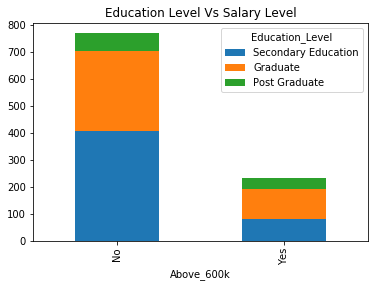

In [28]:
sal_data.groupby(['Above_600k', 'Education_Level']).\
                 size().unstack().plot(kind = 'bar', stacked = True)
plt.title('Education Level Vs Salary Level')
plt.show()

### Pivot table

* A pivot table is a data summarization tool frequently used in spreadsheet programs.

* It aggregates a table of data by one or more keys, arranging the data in a rectangle with some of the group keys along the rows and some along the columns. 

* Groupby facilty and reshape operations of pandas make pivot tables possible.

* The function pivot_table can provide margin totals (subtotals) in addition to providing an interface to groupby.

Use sal_data. Compute a table of group means of salary and experience arranged by maritalStatus. Put gender in the table columns and maritalStatus in the rows.

In [29]:
pvt = sal_data.pivot_table(['salary','experience'], index=['maritalStatus', 'Education_Level'],\
                           columns='gender', aggfunc = 'mean')

pvt

experience                    salary  \
gender                                 Female       Male         Female   
maritalStatus  Education_Level                                            
Divorced       Secondary Education  21.488372  21.210526  441162.790698   
               Graduate             22.681818  20.166667  526518.181818   
               Post Graduate        15.733333  21.875000  420960.000000   
Married        Secondary Education  19.194444  20.636364  403966.666667   
               Graduate             19.435897  20.363636  458830.769231   
               Post Graduate        17.000000  16.714286  446800.000000   
Separated      Secondary Education  22.181818  22.173077  452778.181818   
               Graduate             19.371429  19.581395  455645.714286   
               Post Graduate        21.785714  22.692308  544428.571429   
Spouse Expired Secondary Education  22.264151  19.938776  447479.245283   
               Graduate             20.133333  16.948718  470400.000000   
               Post Graduate        22.000000  24.333333  548800.000000   
Unmarried      Secondary Education  19.211538  19.818182  407753.846154   
               Graduate             20.871795  20.854167  487200.000000   
               Post Graduate        20.777778  22.285714  523866.666667   

                                                   
gender                                       Male  
maritalStatus  Education_Level                     
Divorced       Secondary Education  435810.526316  
               Graduate             476150.000000  
               Post Graduate        546250.000000  
Married        Secondary Education  426836.363636  
               Graduate             476854.545455  
               Post Graduate        440971.428571  
Separated      Secondary Education  450146.153846  
               Graduate             463069.767442  
               Post Graduate        562923.076923  
Spouse Expired Secondary Education  411951.020408  
               Graduate             415323.076923  
               Post Graduate        596400.000000  
Unmarried      Secondary Education  417509.090909  
               Graduate             491400.000000  
               Post Graduate        554628.571429

### Visualization

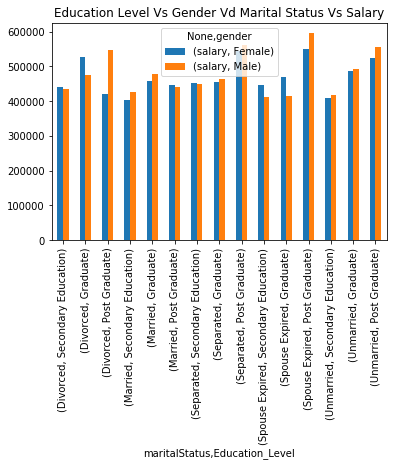

In [30]:
pvt1 = sal_data.pivot_table(['salary'], index=['maritalStatus', 'Education_Level'],\
                           columns='gender', aggfunc = 'mean')

pvt1.plot(kind = 'bar')
plt.title('Education Level Vs Gender Vd Marital Status Vs Salary')
plt.show()

Pivot table options

| Name | Description |
| ----- | ---------------- |
| values | Column name or names to aggregate; by default aggregates all numeric columns |
| index | Column name or other group keys to group on the rows of the resulting pivot table |
| columns | Column names or other group keys to group on the columns of the resulting pivot table |
| aggfunc | Aggregation function or list of functions ('mean' by default); can be any function such as sum or count valid in a groupby context |
| fill_value | Replace missing values in result table |
| dropna | If true, exclude columns whose entries are all NA |
| margins | Add row / column subtotals and grand total (False by default)|


### Crosstab

#### A cross-tabulation (or crosstab) computes group frequencies. It is a special case of a pivot table.


In [31]:
### Summarize the sal_data by Education_Level and maritalStatus.

ct  = pd.crosstab(sal_data['Education_Level'],\
                  sal_data['maritalStatus'], margins = True) #with subtotals 
ct1 = pd.crosstab(sal_data['Education_Level'],\
                  sal_data['maritalStatus'], margins = False) 


In [32]:
ct1

maritalStatus,Divorced,Married,Separated,Spouse Expired,Unmarried
Education_Level,,,,,
Secondary Education,100,80,107,102,96
Graduate,92,83,78,69,87
Post Graduate,23,16,27,17,23


### Visualization

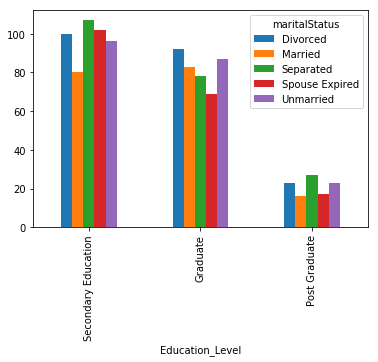

In [33]:
ct1.plot(kind = 'bar')
plt.show()

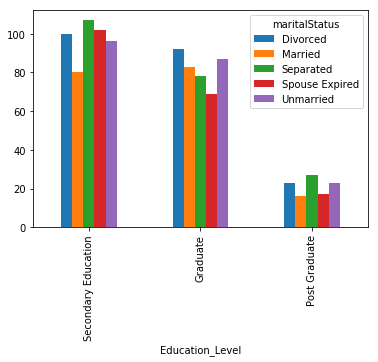

In [34]:
ct1.plot(kind = 'bar')
plt.show()

Refer http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

## 3. Sort

##### Often it is needed to rearrange the sequence of the rows of a data frame by sorting.  

###### Two kinds of sorting available in Pandas, namely:
* a. By label
* b. By actual value

######  a. By label
To sort lexicographically by row or column index, use the sort_index method, which returns a new, sorted object.

In [35]:
df = pd.DataFrame(np.arange(100).reshape((25,4)), \
                  index = [11,10,12,13,14,15,16,17,18,\
                           19,20,21,22,23,24,0,1,2,3,4,5,6,7,8,9], \
                  columns = ['z','x','y','w'])
print("\n Row-wise")
print(df.sort_index(axis = 0)) 


 Row-wise
     z   x   y   w
0   60  61  62  63
1   64  65  66  67
2   68  69  70  71
3   72  73  74  75
4   76  77  78  79
5   80  81  82  83
6   84  85  86  87
7   88  89  90  91
8   92  93  94  95
9   96  97  98  99
10   4   5   6   7
11   0   1   2   3
12   8   9  10  11
13  12  13  14  15
14  16  17  18  19
15  20  21  22  23
16  24  25  26  27
17  28  29  30  31
18  32  33  34  35
19  36  37  38  39
20  40  41  42  43
21  44  45  46  47
22  48  49  50  51
23  52  53  54  55
24  56  57  58  59


In [36]:
print("\n Column-wise")
print(df.sort_index(axis = 1)) 


 Column-wise
     w   x   y   z
11   3   1   2   0
10   7   5   6   4
12  11   9  10   8
13  15  13  14  12
14  19  17  18  16
15  23  21  22  20
16  27  25  26  24
17  31  29  30  28
18  35  33  34  32
19  39  37  38  36
20  43  41  42  40
21  47  45  46  44
22  51  49  50  48
23  55  53  54  52
24  59  57  58  56
0   63  61  62  60
1   67  65  66  64
2   71  69  70  68
3   75  73  74  72
4   79  77  78  76
5   83  81  82  80
6   87  85  86  84
7   91  89  90  88
8   95  93  94  92
9   99  97  98  96


######  b. By actual value

You can sort using one or more columns as the sort keys when sorting a data frame by using sort_values()

In [37]:
df.sort_values(by = ['w','z'])
print(df)

     z   x   y   w
11   0   1   2   3
10   4   5   6   7
12   8   9  10  11
13  12  13  14  15
14  16  17  18  19
15  20  21  22  23
16  24  25  26  27
17  28  29  30  31
18  32  33  34  35
19  36  37  38  39
20  40  41  42  43
21  44  45  46  47
22  48  49  50  51
23  52  53  54  55
24  56  57  58  59
0   60  61  62  63
1   64  65  66  67
2   68  69  70  71
3   72  73  74  75
4   76  77  78  79
5   80  81  82  83
6   84  85  86  87
7   88  89  90  91
8   92  93  94  95
9   96  97  98  99


### The following code sorts the sal_data, pandas dataframe by descending values of the column salary & age

##### Set the index for sal_data, a DataFrame using empID, existing column(s).

In [38]:
sal_df                = sal_data.set_index('empID')
sal_df.sort_values(by = ['salary','age'], ascending = False)

,age,eduYears,experience,salary,gender,maritalStatus,Above_600k,Education_Level,age_bin,Gender_Marital
empID,,,,,,,,,,
59205,53.7,17,37,854800,Female,Divorced,Yes,Post Graduate,"(45.5, 54.9]",Female-Divorced
39933,53.2,17,36,834400,Male,Unmarried,Yes,Post Graduate,"(45.5, 54.9]",Male-Unmarried
58605,54.8,16,38,829600,Female,Divorced,Yes,Graduate,"(45.5, 54.9]",Female-Divorced
20892,54.7,16,38,829600,Male,Unmarried,Yes,Graduate,"(45.5, 54.9]",Male-Unmarried
70562,52.4,17,35,814000,Female,Spouse Expired,Yes,Post Graduate,"(45.5, 54.9]",Female-Widow
46198,51.7,17,35,814000,Male,Separated,Yes,Post Graduate,"(45.5, 54.9]",Male-Separated
28204,54.1,16,37,810400,Female,Spouse Expired,Yes,Graduate,"(45.5, 54.9]",Female-Widow
68584,54.0,16,37,810400,Male,Divorced,Yes,Graduate,"(45.5, 54.9]",Male-Divorced
12511,54.0,16,37,810400,Male,Divorced,Yes,Graduate,"(45.5, 54.9]",Male-Divorced


### The following code sorts the sal_data, pandas dataframe by descending values of the column salary & ascending order of age

In [39]:
 sal_df.sort_values(by = ['salary','age'], ascending = [False, True])

,age,eduYears,experience,salary,gender,maritalStatus,Above_600k,Education_Level,age_bin,Gender_Marital
empID,,,,,,,,,,
59205,53.7,17,37,854800,Female,Divorced,Yes,Post Graduate,"(45.5, 54.9]",Female-Divorced
39933,53.2,17,36,834400,Male,Unmarried,Yes,Post Graduate,"(45.5, 54.9]",Male-Unmarried
20892,54.7,16,38,829600,Male,Unmarried,Yes,Graduate,"(45.5, 54.9]",Male-Unmarried
58605,54.8,16,38,829600,Female,Divorced,Yes,Graduate,"(45.5, 54.9]",Female-Divorced
46198,51.7,17,35,814000,Male,Separated,Yes,Post Graduate,"(45.5, 54.9]",Male-Separated
70562,52.4,17,35,814000,Female,Spouse Expired,Yes,Post Graduate,"(45.5, 54.9]",Female-Widow
63286,53.7,16,37,810400,Male,Unmarried,Yes,Graduate,"(45.5, 54.9]",Male-Unmarried
83012,53.7,16,37,810400,Female,Married,Yes,Graduate,"(45.5, 54.9]",Female-Married
73921,53.8,16,37,810400,Female,Unmarried,Yes,Graduate,"(45.5, 54.9]",Female-Unmarried


### Ranking assigns ranks from one through the number of valid data points in an array. 
#### In case of a tie, rank breaks the tie by assigning each group the mean rank.

In [40]:
sal_df['Rank'] = sal_df.experience.rank() 
# Default - Average rank assigned in case of a tie
sal_df.head()

,age,eduYears,experience,salary,gender,maritalStatus,Above_600k,Education_Level,age_bin,Gender_Marital,Rank
empID,,,,,,,,,,,
19096,49.5,13,32,599200,Female,Unmarried,No,Secondary Education,"(45.5, 54.9]",Female-Unmarried,847.0
59783,37.6,13,21,427600,Male,Spouse Expired,No,Secondary Education,"(37.45, 45.5]",Male-Widower,518.5
58741,24.8,15,8,244000,Male,Divorced,No,Graduate,"(21.099, 29.275]",Male-Divorced,112.5
59870,32.9,15,16,388000,Male,Spouse Expired,No,Graduate,"(29.275, 37.45]",Male-Widower,367.5
78873,46.9,12,30,532000,Male,Divorced,No,Secondary Education,"(45.5, 54.9]",Male-Divorced,791.5


In [41]:
sal_df_age = sal_df.age.sort_values()
sal_df_age.rank(method = 'first') 
#  in the order in which they’re observed in the data

empID
18795       1.0
42234       2.0
34373       3.0
12087       4.0
72747       5.0
45175       6.0
27572       7.0
60200       8.0
79175       9.0
56741      10.0
24906      11.0
80667      12.0
27987      13.0
89899      14.0
48938      15.0
28772      16.0
34869      17.0
13056      18.0
41134      19.0
66707      20.0
75172      21.0
26882      22.0
28287      23.0
69190      24.0
48522      25.0
34437      26.0
79171      27.0
26335      28.0
57207      29.0
34238      30.0
          ...  
52552     971.0
83012     972.0
63286     973.0
62963     974.0
59205     975.0
31209     976.0
70096     977.0
77496     978.0
84831     979.0
73921     980.0
68584     981.0
12511     982.0
79711     983.0
66641     984.0
28204     985.0
71288     986.0
13199     987.0
68595     988.0
64953     989.0
51140     990.0
41483     991.0
86584     992.0
19745     993.0
34900     994.0
20892     995.0
58605     996.0
41607     997.0
47752     998.0
43353     999.0
40426    1000.0
Name: age, Length:

In [42]:
sal_df_age.rank(method = 'average') 

empID
18795      4.5
42234      4.5
34373      4.5
12087      4.5
72747      4.5
45175      4.5
27572      4.5
60200      4.5
79175      9.0
56741     10.5
24906     10.5
80667     13.0
27987     13.0
89899     13.0
48938     15.5
28772     15.5
34869     18.0
13056     18.0
41134     18.0
66707     20.0
75172     21.5
26882     21.5
28287     24.5
69190     24.5
48522     24.5
34437     24.5
79171     27.5
26335     27.5
57207     32.5
34238     32.5
         ...  
52552    971.0
83012    974.0
63286    974.0
62963    974.0
59205    974.0
31209    974.0
70096    978.5
77496    978.5
84831    978.5
73921    978.5
68584    982.5
12511    982.5
79711    982.5
66641    982.5
28204    985.0
71288    986.5
13199    986.5
68595    988.5
64953    988.5
51140    990.5
41483    990.5
86584    993.5
19745    993.5
34900    993.5
20892    993.5
58605    997.0
41607    997.0
47752    997.0
43353    999.5
40426    999.5
Name: age, Length: 1000, dtype: float64

#### Compute ranks over all numeric columns

In [43]:
sal_df.rank(axis='columns') 

,age,eduYears,experience,salary,Rank
empID,,,,,
19096,3.0,1.0,2.0,5.0,4.0
59783,3.0,1.0,2.0,5.0,4.0
58741,3.0,2.0,1.0,5.0,4.0
59870,3.0,1.0,2.0,5.0,4.0
78873,3.0,1.0,2.0,5.0,4.0
61224,3.0,1.0,2.0,5.0,4.0
10759,3.0,1.0,2.0,5.0,4.0
28604,3.0,2.0,1.0,5.0,4.0
63286,3.0,1.0,2.0,5.0,4.0


### Tie breaking methods with rank

| Method | Description |
| ----------- | ------------------------------------------------------------------------------------------|
| average | Default Assigns the average rank to each entry in the equal group. |
| min         | Use the minimum rank for the whole group |
| max        | Use the maximum rank for the whole group |
| first         | Assign ranks in the order the values appear in the data |
| dense     | Similar to min method; but ranks always increase by 1 in between groups rather than the number of equal elements in a group |


## 4. Merge

###### Pandas merge connects rows in DataFrames based on one or more keys and implements database join operations.

###### Pandas concat concatenates or stacks together obejcts along an axis.

###### Merge or join operations combine datasets by linking rows using one or more keys. 

Different join type with how argument

| Option | Behavior |
| --------- | ------------------------------- |
| inner | Use only the key combinations observed in both tables |
| left | Use all key combinations found in the left table |
| right | Use all key combinations found in the right table |
| output | Use all key combinations observed in both tables together | 


** Inner join where the keys in the result are the intersection or the common set found in both tables.** 


In [44]:
import  pandas as pd

df1   = pd.DataFrame({'empid': ['1001','1002','1003','1004','1005','1006','1007','1008','1009','1010'],
                    'age':   [21,21,22,23,24,42,42,40,34,35]})
df2   = pd.DataFrame({'empid': ['1001','1002','1003','1004'],'salary': [10000.00,11000.00,11500.00,12000.00]})

print('\ndf1')
print(df1.head())
print('\ndf2')
print(df2.head())


df1
  empid  age
0  1001   21
1  1002   21
2  1003   22
3  1004   23
4  1005   24

df2
  empid   salary
0  1001  10000.0
1  1002  11000.0
2  1003  11500.0
3  1004  12000.0


In [45]:
### Many to one join

print(pd.merge(df1,df2)) # uses the overlapping column names as the keys.

  empid  age   salary
0  1001   21  10000.0
1  1002   21  11000.0
2  1003   22  11500.0
3  1004   23  12000.0


In [46]:
pd.merge(df1,df2, on = 'empid')  # common 'key'

,empid,age,salary
0,1001,21,10000.0
1,1002,21,11000.0
2,1003,22,11500.0
3,1004,23,12000.0


### Merge two data frames when key names are different

In [47]:
df1 = pd.DataFrame({'empid': ['1001','1002','1003','1004','1005','1006','1007','1008','1009','1010'],
                    'age':   [21,21,22,23,24,42,42,40,34,35]})
df2 = pd.DataFrame({'Empid': ['1001','1002','1003','1004'],'salary': [10000.00,11000.00,11500.00,12000.00]})


In [48]:
 pd.merge(df1, df2, left_on = 'empid', right_on = 'Empid') 

,empid,age,Empid,salary
0,1001,21,1001,10000.0
1,1002,21,1002,11000.0
2,1003,22,1003,11500.0
3,1004,23,1004,12000.0


##### We can use the suffixes option for specifying strings to append to overlappint names in the left and right Data Frame objects.


In [49]:
df1 = pd.DataFrame({'empid': ['1001','1002','1003','1004','1005','1006','1007','1008','1009','1010'],
                    'dept' : ['D01','D02','D03','D04','D01','D01','D07','D08','D09','D10'],
                    'age':   [21,21,22,23,24,42,42,40,34,35]})
df2 = pd.DataFrame({'empid': ['1001','1002','1003','1004'],
                     'dept' : ['D01','D02','D03','D04'],
                    'salary': [10000.00,11000.00,11500.00,12000.00]})

pd.merge(df1, df2, on = 'empid', suffixes = ['_left', '_right'])

,empid,dept_left,age,dept_right,salary
0,1001,D01,21,D01,10000.0
1,1002,D02,21,D02,11000.0
2,1003,D03,22,D03,11500.0
3,1004,D04,23,D04,12000.0


### Outer join takes the union of the keys combining the effect of applying both left and right joins.

In [50]:
df1 = pd.DataFrame({'empid': ['1001','1002','1003','1004','1005','1006','1007','1008','1009','1010'],
                    'age':   [21,21,22,23,24,42,42,40,34,35]})
df2 = pd.DataFrame({'empid': ['1001','1002','1003','1004'],'salary': [10000.00,11000.00,11500.00,12000.00]})

pd.merge(df1, df2, how = 'outer')

,empid,age,salary
0,1001,21,10000.0
1,1002,21,11000.0
2,1003,22,11500.0
3,1004,23,12000.0
4,1005,24,NaN
5,1006,42,NaN
6,1007,42,NaN
7,1008,40,NaN
8,1009,34,NaN
9,1010,35,NaN


###### Many to many merges have well-defined, though not necessarily intuitive, behavior.

###### Many to many joins form the Cartesian product of the rows. 

In [51]:
pd.merge(df1, df2, on = 'empid', how = 'left')

,empid,age,salary
0,1001,21,10000.0
1,1002,21,11000.0
2,1003,22,11500.0
3,1004,23,12000.0
4,1005,24,NaN
5,1006,42,NaN
6,1007,42,NaN
7,1008,40,NaN
8,1009,34,NaN
9,1010,35,NaN


### Merge function arguments

| Argument | Description |
| ---------- | -------------------------------- |
| left | DataFrame to be merges on LHS |
| right | DataFrame to be merges on RHS |
| how | One of inner, outer, left or right defaults to inner |
| on | Column names to join on |
| left_on | Columns in the left DataFrame to use as join key |
| right_on | Columns in the right DataFrame to use as join key |
| left_index | Use row index in left as its join key for keys |
| right_index | Use row index in right as its join key for keys |
| sort | Sort merged data lexicographically by join keys; dedault true |
| suffixes | Tuple of string values to append column names in case of overlap; defaults to ('_x','_y') |
| copy | Copies resulting data structure; default True |
| indicator | Adds a special column_merge that indicates the source of each row such as 'left_only', 'right_only', 'both'  based on the origin of the joined data in each row |

### Merging on index

#### There may be cases, index of a data frame may contain the merge keys and you need to pass left_index = True or right_index = True.


In [52]:

left_emp_df = pd.DataFrame({'empID': [59205,39933,58605],
                            'DOL': ['2018-12-31','2018-08-31','2018-10-31']})

print("\n<==== sal_df Data structure ===>\n")
print(sal_df.info())
print("\n<==== Merge on index example using sal_df ===>\n")
pd.merge(left_emp_df,sal_df, on = 'empID', right_index = True, how = 'inner') 


<==== sal_df Data structure ===>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 19096 to 25631
Data columns (total 11 columns):
age                1000 non-null float64
eduYears           1000 non-null int64
experience         1000 non-null int64
salary             1000 non-null int64
gender             1000 non-null object
maritalStatus      1000 non-null object
Above_600k         1000 non-null object
Education_Level    1000 non-null category
age_bin            1000 non-null category
Gender_Marital     1000 non-null object
Rank               1000 non-null float64
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 80.2+ KB
None

<==== Merge on index example using sal_df ===>



,empID,DOL,age,eduYears,experience,salary,gender,maritalStatus,Above_600k,Education_Level,age_bin,Gender_Marital,Rank
0,59205,2018-12-31,53.7,17,37,854800,Female,Divorced,Yes,Post Graduate,"(45.5, 54.9]",Female-Divorced,979.0
1,39933,2018-08-31,53.2,17,36,834400,Male,Unmarried,Yes,Post Graduate,"(45.5, 54.9]",Male-Unmarried,954.5
2,58605,2018-10-31,54.8,16,38,829600,Female,Divorced,Yes,Graduate,"(45.5, 54.9]",Female-Divorced,994.0


### Join

Dataframe has a convenient join instance for merging by index. 
We can combine many dataframes together having the same or similar indexes but non-overlapping columns.

In [53]:
left_emp_df = pd.DataFrame({'empID': [59205,39933,58605],
                            'DOL': ['2018-12-31','2018-08-31','2018-10-31']})
left_emp_df = left_emp_df.set_index('empID')

print("\n<==== Join for Merging by index; example using sal_df ===>\n")
left_emp_df.join(sal_df,how = 'inner') 


<==== Join for Merging by index; example using sal_df ===>



,DOL,age,eduYears,experience,salary,gender,maritalStatus,Above_600k,Education_Level,age_bin,Gender_Marital,Rank
empID,,,,,,,,,,,,
39933,2018-08-31,53.2,17,36,834400,Male,Unmarried,Yes,Post Graduate,"(45.5, 54.9]",Male-Unmarried,954.5
58605,2018-10-31,54.8,16,38,829600,Female,Divorced,Yes,Graduate,"(45.5, 54.9]",Female-Divorced,994.0
59205,2018-12-31,53.7,17,37,854800,Female,Divorced,Yes,Post Graduate,"(45.5, 54.9]",Female-Divorced,979.0


**You can pass a list of data frames to join as an alternative way to concat function.**

In [54]:
dept_emp_df = pd.DataFrame({'empID': [59205,39933,58605],
                            'Dept': ['HR','HR','Production']})
dept_emp_df = dept_emp_df.set_index('empID')

print("\n<==== Join for Merging data frames by index; example using sal_df ===>\n")
left_emp_df.join([sal_df,dept_emp_df],how = 'inner')



<==== Join for Merging data frames by index; example using sal_df ===>



,DOL,age,eduYears,experience,salary,gender,maritalStatus,Above_600k,Education_Level,age_bin,Gender_Marital,Rank,Dept
empID,,,,,,,,,,,,,
39933,2018-08-31,53.2,17,36,834400,Male,Unmarried,Yes,Post Graduate,"(45.5, 54.9]",Male-Unmarried,954.5,HR
58605,2018-10-31,54.8,16,38,829600,Female,Divorced,Yes,Graduate,"(45.5, 54.9]",Female-Divorced,994.0,Production
59205,2018-12-31,53.7,17,37,854800,Female,Divorced,Yes,Post Graduate,"(45.5, 54.9]",Female-Divorced,979.0,HR


## 5. Append

### a. concat function

page 247

**The concat function in pandas provides a uniform way to combine the data as shown below:**

*By default, concat works along axis = 0 yielding another series. If you specify axis = 1, you get  a data frame.*

In [55]:
leave_accured_dept1 = pd.Series([2,3,5,0,7,8], index = ['1001','1002','1003','1004','1005','1006'])
leave_accured_dept2 = pd.Series([6,1,2,3], index = ['1007','1008','1009','1010'])
pd.concat([leave_accured_dept1, leave_accured_dept2])

1001    2
1002    3
1003    5
1004    0
1005    7
1006    8
1007    6
1008    1
1009    2
1010    3
dtype: int64

In [56]:
leave_accured_dept1 = pd.Series([2,3,5,0,7,8], index = ['1001','1002','1003','1004','1005','1006'])
leave_accured_name  = pd.Series(['Divya','Gayathri','Khaliq','Vikas','Elizabeth','Sangeetha'], \
                                index = ['1001','1002','1003','1004','1005','1006'])
df = pd.concat([leave_accured_dept1, leave_accured_name], axis = 1)

### Verify the type of the resulting object of concat funtion. If it is a dataframe, name the columns.

In [57]:
print(type(df))

if  isinstance(df, pd.DataFrame):
    print("\n Resulting object, df is a data frame\n")
    df1 = pd.DataFrame(df.values, columns = ['Leave accrued', 'Name'])
    print(df1)

<class 'pandas.core.frame.DataFrame'>

 Resulting object, df is a data frame

  Leave accrued       Name
0             2      Divya
1             3   Gayathri
2             5     Khaliq
3             0      Vikas
4             7  Elizabeth
5             8  Sangeetha


We observe that there are overlaps on the other axis. 
Let us try with some non-overlapping data.

In [58]:
leave_accured_dept1 = pd.Series([2,3,5,0,7,8], index = ['1001','1002','1003','1004','1005','1006'])
leave_accured_name  = pd.Series(['Divya','Gayathri','Khaliq','Vikas','Elizabeth','Sangeetha','Rajesh',\
                                 'Raju','Susan','Samuel'], index = ['1001','1002','1003','1004','1005',\
                                                                    '1006','1007','1008','1009','1010'])
df = pd.concat([leave_accured_dept1, leave_accured_name], axis = 1)
print(df)

        0          1
1001  2.0      Divya
1002  3.0   Gayathri
1003  5.0     Khaliq
1004  0.0      Vikas
1005  7.0  Elizabeth
1006  8.0  Sangeetha
1007  NaN     Rajesh
1008  NaN       Raju
1009  NaN      Susan
1010  NaN     Samuel


D:\Python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


*By using inner join, the non-overlapping values indicated by NaN having labels 'Rajesh','Raju','Susan','Samuel' disappear as shown below:*

In [59]:
df = pd.concat([leave_accured_dept1, leave_accured_name], axis = 1, join = 'inner')

In [60]:
print(type(df))

if  isinstance(df, pd.DataFrame):
    print("\n Resulting object, df is a data frame\n")
    df1 = pd.DataFrame(df.values, columns = ['Leave accrued', 'Name'])
    print(df1)

<class 'pandas.core.frame.DataFrame'>

 Resulting object, df is a data frame

  Leave accrued       Name
0             2      Divya
1             3   Gayathri
2             5     Khaliq
3             0      Vikas
4             7  Elizabeth
5             8  Sangeetha


You can create horizontal axis and name the created axis levels.

In [61]:
df1 = pd.DataFrame(np.arange(12).reshape(3, 4), index=['a', 'b', 'c'], columns=['East', 'West','North','South'])
df2 = pd.DataFrame(1 + np.arange(8).reshape(2, 4), index=['a', 'c'],  columns=['East', 'West','North','South'])

**If you pass a dict of objects, the dict’s keys will be used for the keys option:**

In [62]:
 pd.concat({'level1': df1, 'level2': df2}, axis=1) 

D:\Python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1                  level2                 
    East West North South   East West North South
a      0    1     2     3    1.0  2.0   3.0   4.0
b      4    5     6     7    NaN  NaN   NaN   NaN
c      8    9    10    11    5.0  6.0   7.0   8.0

In [63]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower']) 

D:\Python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


upper level1                  level2                 
lower   East West North South   East West North South
a          0    1     2     3    1.0  2.0   3.0   4.0
b          4    5     6     7    NaN  NaN   NaN   NaN
c          8    9    10    11    5.0  6.0   7.0   8.0

http://www.datasciencemadesimple.com/hierarchical-indexing-multiple-indexing-python-pandas/

*If you want data to be created for all employees, whether they have accrued leave or not, you pass the argument, ignore_index = True.*

In [103]:
leave_accured_dept1 = pd.Series([2,3,5,0,7,8], index = ['1001','1002','1003','1004','1005','1006'])
leave_accured_name  = pd.Series(['Divya','Gayathri','Khaliq','Vikas','Elizabeth','Sangeetha','Rajesh',\
                                 'Raju','Susan','Samuel'], index = ['1001','1002','1003','1004','1005',\
                                                                    '1006','1007','1008','1009','1010'])

df = pd.concat([leave_accured_dept1, leave_accured_name], axis = 1,  ignore_index = True)
print(type(df))

if  isinstance(df, pd.DataFrame):
    print("\n Resulting object, df is a data frame\n")
    df_1 = pd.DataFrame(df.values, columns = ['Leave accrued', 'Name'])
    df_1.loc[df_1['Leave accrued'].isnull(),'Leave accrued'] = 0 # If null, replace with 0
    print(df_1)


<class 'pandas.core.frame.DataFrame'>

 Resulting object, df is a data frame

  Leave accrued       Name
0             2      Divya
1             3   Gayathri
2             5     Khaliq
3             0      Vikas
4             7  Elizabeth
5             8  Sangeetha
6             0     Rajesh
7             0       Raju
8             0      Susan
9             0     Samuel


Concat function arguments

| Argument | Description |
| ------- | -------------------------------- |
| objs | List or dict of pandas objects to be concatenated |
| axis | axis to concatenate along 0 means rows 1 means columns |
| join | 'inner' or 'outer' Intersection or union; def: outer |
| join_axes | Specific indexes to unse for other n-1 axes instead of performing union or intersection logic |
| keys | Values to associate with objects being concatenated, forming a hierarchical index along the concatenation axis; can either be a list or array or arbitrary values, an array of tuples, or a list of arrays|
| levels | Specific indexes to use as hierachical index level or levels of keys passed |
| names | Names for created hierarchical levels if keys and / or levels passed |
| verify_integrity | Check new axis in concatenated object for duplicates; default: False|
| ignore_index | Do not preserve indexes along concatenation axis, instead producing a new range (total_length) index | 

## b. append function

### Add rows in a DataFrame using append()

In [104]:
### Create a data frame
employees =  pd.DataFrame({'empID': [59205,39933,58605], 'Dept': ['HR','HR','Production']})

## We display the contents of the data frame 
print(employees)

   empID        Dept
0  59205          HR
1  39933          HR
2  58605  Production


#### 1. Add a row to the data frame using dataframe.append() and dictionary

In [105]:
emp_dict = {'empID': 39930,'Dept': 'Accounts'}

In [106]:
employees_new = employees.append(emp_dict, ignore_index = True)

#### Passing ignore_index = True is necessary while passing the dictionary or series to the data frame  otherwise a TypeError is displayed.

In [107]:
employees_new = employees.append(emp_dict, ignore_index = True)
print(employees_new)

   empID        Dept
0  59205          HR
1  39933          HR
2  58605  Production
3  39930    Accounts


#### 2.  Add rows in the data frame using dataframe.append() 


In [108]:
emp_dict = {'empID': [39934,39931],'Dept': ['Accounts','HR']}

In [109]:
emp_df   = pd.DataFrame(emp_dict)
print(emp_df)

   empID      Dept
0  39934  Accounts
1  39931        HR


In [110]:
employees_new = employees_new.append(emp_df, ignore_index = True)
employees_new.set_index('empID', inplace = True)
employees_new.sort_values(by = 'empID', inplace = True)
print(employees_new)

             Dept
empID            
39930    Accounts
39931          HR
39933          HR
39934    Accounts
58605  Production
59205          HR


https://thispointer.com/python-pandas-how-to-add-rows-in-a-dataframe-using-dataframe-append-loc-iloc/

Add multiple rows in the data frame using dataframe.append() and Series

In [111]:
listOfSeries = [pd.Series([40021, 'Marketing'], index = ['empID','Dept'] ) ,
                pd.Series([40022, 'R&D'], index = ['empID','Dept']) ,
                pd.Series([40023, 'Purchase'], index = ['empID','Dept']) ]

In [112]:
print(listOfSeries)

[empID        40021
Dept     Marketing
dtype: object, empID    40022
Dept       R&D
dtype: object, empID       40023
Dept     Purchase
dtype: object]


In [113]:
df_L = pd.DataFrame(listOfSeries)
print(df_L)

   empID       Dept
0  40021  Marketing
1  40022        R&D
2  40023   Purchase


In [114]:
employees_new = employees.append(df_L, ignore_index = True)
employees_new.set_index('empID', inplace = True)


print(employees_new)
print(employees_new.info())

             Dept
empID            
59205          HR
39933          HR
58605  Production
40021   Marketing
40022         R&D
40023    Purchase
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 59205 to 40023
Data columns (total 1 columns):
Dept    6 non-null object
dtypes: object(1)
memory usage: 96.0+ bytes
None


* We observe that employees_new, data frame has one index column and one other column, Dept.
* We shall add a new row at index 40040 with values provided in list. It will replace any existing value in that row or add to the new row.

#### Add a row in the data frame using loc[] & list

In [115]:
employees_new.loc[40040] = ['Marketing']

In [116]:
employees_new.sort_values(by = 'empID', inplace = True)
print(employees_new)

             Dept
empID            
39933          HR
40021   Marketing
40022         R&D
40023    Purchase
40040   Marketing
58605  Production
59205          HR


##### Add a row in the data frame at the index position using iloc[]

It will replace the row at index position 1 in dataframe emp1_df with new row

In [117]:
S1      = pd.Series([40021, 'Marketing'], index = ['empID','Dept'])
S2      = pd.Series([40022, 'R&D'], index = ['empID','Dept'])
emp1_df = pd.DataFrame([S1,S2])
print(emp1_df)
emp1_df.iloc[1] = [60000,'Sales & Marketing']
print(emp1_df)

   empID       Dept
0  40021  Marketing
1  40022        R&D
   empID               Dept
0  40021          Marketing
1  60000  Sales & Marketing


 The function, combine_first does patching missing data in the calling object with data from the object you pass:

In [118]:
S3      = pd.Series([40021, np.nan], index = ['empID','Dept'])
S4      = pd.Series([60022, 'Admin'], index = ['empID','Dept'])
S5      = pd.Series([60023, 'HR'], index = ['empID','Dept'])

S10     = pd.Series([40021, 'Development'], index = ['empID','Dept'])
S11     = pd.Series([60023, 'R&D'], index = ['empID','Dept'])
S12     = pd.Series([60024, np.nan], index = ['empID','Dept'])
S13     = pd.Series([60025, np.nan], index = ['empID','Dept'])


emp_df1 = pd.DataFrame([S3,S4,S5])
emp_df2 = pd.DataFrame([S10,S11, S12, S13])
emp_df3 = emp_df1.combine_first(emp_df2) 
print(emp_df3)

     empID         Dept
0  40021.0  Development
1  60022.0        Admin
2  60023.0           HR
3  60025.0          NaN


### Titanic Data set

## Load required libraries

In [80]:
import pandas            as pd # Set alias as pd for pandas
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn           as sns
import time
from   datetime          import timedelta
import getpass
from   platform          import python_version
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

""" 
The command %matplotlib inline  is used to get the the output of plotting commands displayed 
inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
The resulting plots will then also be stored in the notebook document.

"""

' \nThe command %matplotlib inline  is used to get the the output of plotting commands displayed \ninline within frontends like the Jupyter notebook, directly below the code cell that produced it. \nThe resulting plots will then also be stored in the notebook document.\n\n'

### Get the version number of each of the libraries

In [81]:
print("\n Pandas version %s " %pd.__version__)
print("\n NumPy version %s " %np.__version__)
print("\n Matplotlib version %s " %matplotlib.__version__)
print("\n Seaborn version %s " %sns.__version__)
ver = " User: " + getpass.getuser() + " is currently using Python version: " + python_version()
print("\n Info %s" %ver)


 Pandas version 0.23.4 

 NumPy version 1.16.3 

 Matplotlib version 2.1.0 

 Seaborn version 0.8.0 

 Info  User: PVS is currently using Python version: 3.6.3


### Measure the time taken for this EDA exercise

In [82]:
start_time = time.time()

### Get titanic dataset from the following URL
https://www.kaggle.com/broaniki/titanic#kaggle-titanic-master.zip

In [83]:
df = pd.read_csv('D:/RRD/kaggle-titanic-master/input/train.csv', header = 0, encoding = 'latin-1')

### Get the number of observations and number of columns

In [84]:
print("\nTotal number of observations %d Toal numbder of columns %d" %\
      (df.shape[0], df.shape[1]))


Total number of observations 891 Toal numbder of columns 12


## Get column names

In [85]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Get data structure

In [86]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


### Get missing values  - column wise count 

In [87]:
null_columns        = df.columns[df.isnull().any()]
naSummary           = df[null_columns].isnull().sum()

In [88]:
print(naSummary)

Age         177
Cabin       687
Embarked      2
dtype: int64


### Remove missing values

#### Drop column Cabin since the % of missing values is 77% (= 687 / 891 )

In [89]:
df = df.drop('Cabin',axis=1)

In [90]:
titanic_df  = df.dropna()

### Create a  column - Adult 

##### A passenger is classified as an Adult if the age is 21 and above.

In [91]:
### Create a function to define those who are adult (Not less than 21)

def define_adult(age):
    
    res = ''
    try:
        
        res = 'NaN'
        
        val = float(age)

        if val < 21.0:
           res = 'Non-Adult' 
        elif val >= 21.0:
           res = 'Adult' 
        
    except:
        res = 'NaN'
        print("That's not an int!")

    return res

In [92]:
print(titanic_df[['Age']].head())

    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0


In [93]:
titanic_df['Adult'] = titanic_df[['Age']].apply(define_adult, axis = 1)

In [94]:
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Adult
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,Adult
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S,Adult
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S,Adult
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S,Adult
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,Adult
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,Adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Non-Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Adult
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q,Adult


We have created a new column, called Adult.

Let us check the number of Adults and non-adults

In [95]:
print(titanic_df['Adult'].value_counts())

Adult        532
Non-Adult    180
Name: Adult, dtype: int64


### Observation

We have 534 adult passengers and 180 non-adult passengers.
Age is not specified for 177 passengers and hence not possible to check if they are adult or not.

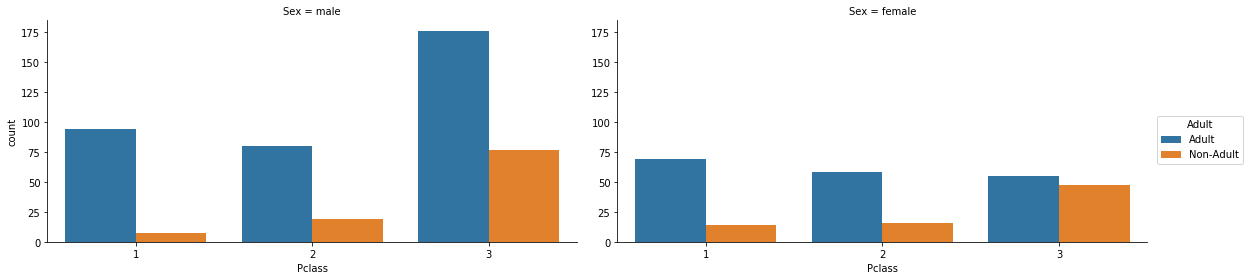

In [96]:
# Lets do a factorplot of passengers splitted into sex, adult and class

sns.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'Adult', col = 'Sex', aspect = 2);

### Observation

There are much more young persons (Non Adults) in third class than there are in first and second class. 

### Lets do a factorplot of passengers splitted into sex, adult and class

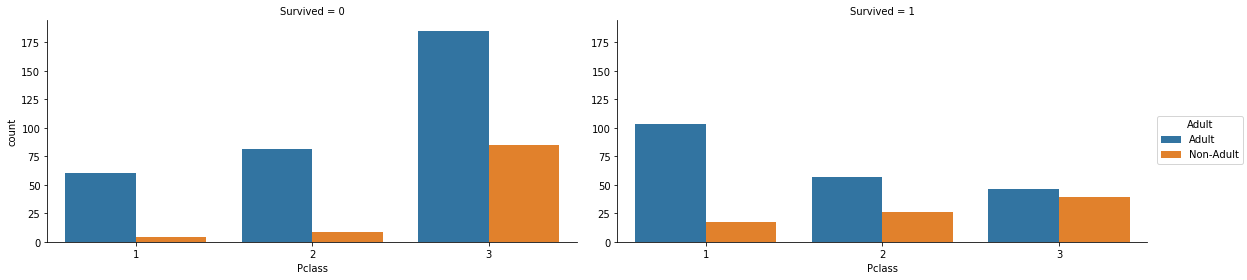

In [97]:
sns.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'Adult', col = 'Survived', aspect = 2);

### Inference

From the figure above, being an adult person or a third class reduce the chance for one to survive.

###  Let us do a factor plot for  Survived vs. Class Grouped by Adult

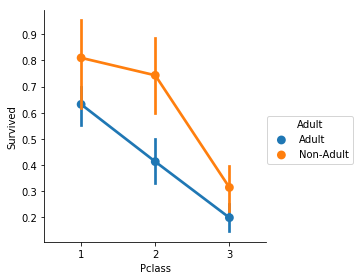

In [98]:
sns.factorplot('Pclass','Survived', hue='Adult', data=titanic_df, order=range(1,4))

### Inference

From the figure above, being an adult person or a third class reduce the chance for one to survive. Same inference as in the previous graph.

### Create a  Alone dataframe i.e. the passenger has no siblings or parents

In [99]:
alone_df                = titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch']==0)]

### Add Alone column
alone_df['Alone']       = 'Alone'

### Not alone data frame i.e. the passenger has either a sibling or a parent.
with_family_df          = titanic_df[(titanic_df['SibSp'] != 0) | (titanic_df['Parch']!=0)]
with_family_df['Alone'] = 'With family'

### Merge the above dataframes and sort by index

In [100]:
combined       = [alone_df, with_family_df ]
titanic_df     = pd.concat(combined).sort_index() ## Merge and sort by index

###  Let us do a factor plot for  Survived vs. Alone Grouped by Class 

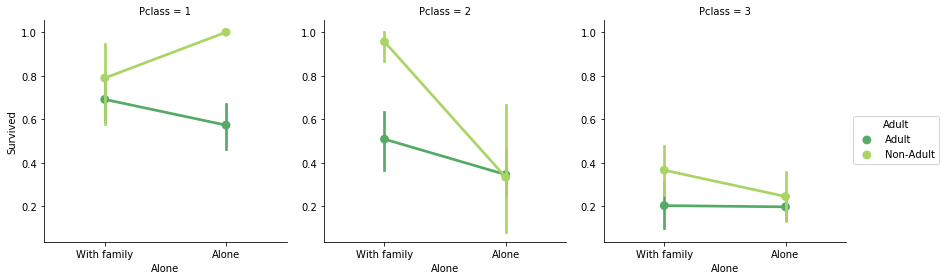

In [101]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='summer', hue='Adult', 
               col='Pclass')

### Inference

* From the figure above, for passenger class 1, chances of survival is more for a person who is alone and also young (non -adult).
* For passenger class 2, being a non-adult person and with family increase the chances to survive. 

In [102]:
elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
print("\n%s"%msg)


Execution took: 0:00:03 secs (Wall clock time)
